# Importing Library


In [1]:
import pandas as pd 
from pandas import Grouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline
import re
import calendar

# Importing Data

In [2]:
path = r'C:\Users\simpe\Citi Bike Analysis'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_2.csv'), index_col = False)

In [5]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   day_of_week              42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_station_id         42993 non-null  int64  
 4   start_station_name       42993 non-null  object 
 5   start_station_latitude   42993 non-null  float64
 6   start_station_longitude  42993 non-null  float64
 7   end_station_id           42993 non-null  int64  
 8   end_station_name         42993 non-null  object 
 9   end_station_latitude     42993 non-null  float64
 10  end_station_longitude    42993 non-null  float64
 11  trip_duration            42993 non-null  int64  
 12  subscriber               42993 non-null  object 
 13  birth_year               42993 non-null  float64
 14  gender                

# Cleaning

In [7]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           5         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [8]:
citi.dtypes

Unnamed: 0                   int64
day_of_week                 object
start_hour                   int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
start_of_ride               object
end_of_ride                 object
dtype: object

In [9]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   day_of_week              42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_station_id         42993 non-null  int64  
 4   start_station_name       42993 non-null  object 
 5   start_station_latitude   42993 non-null  float64
 6   start_station_longitude  42993 non-null  float64
 7   end_station_id           42993 non-null  int64  
 8   end_station_name         42993 non-null  object 
 9   end_station_latitude     42993 non-null  float64
 10  end_station_longitude    42993 non-null  float64
 11  trip_duration            42993 non-null  int64  
 12  subscriber               42993 non-null  object 
 13  birth_year               42993 non-null  float64
 14  gender                

In [10]:
#changing gender variables back to numeric - 0=unknown 1=male 2= female
citi['gender']=citi['gender'].replace(['Uknown','male','female'],[0,1,2])

In [11]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           5         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [12]:
#dropping Unnamed column
citi = citi.drop(columns = ['Unnamed: 0'])

In [13]:
citi.head()

day_of_week  start_hour  start_station_id       start_station_name  \
0         Mon          18               523          W 38 St & 8 Ave   
1         Thu          18               257  Lispenard St & Broadway   
2         Wed          19               479          9 Ave & W 45 St   
3         Sat          11               527          E 33 St & 1 Ave   
4         Fri          22               293    Lafayette St & E 8 St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               40.754666               -73.991382             334   
1               40.719392               -74.002472             236   
2               40.760193               -73.991255             513   
3               40.743156               -73.974347             441   
4               40.730287               -73.990765             432   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4    E 7 St & Avenue A             40.726218             -73.983799   

   trip_duration  subscriber  birth_year  gender        start_of_ride  \
0            993  Subscriber      1968.0       2  2013-09-09 18:18:55   
1            581  Subscriber      1983.0       1  2013-09-12 18:38:53   
2            361  Subscriber      1989.0       1  2013-09-18 19:44:04   
3            561  Subscriber      1988.0       2  2013-09-28 11:54:37   
4            427  Subscriber      1986.0       2  2013-09-27 22:01:01   

           end_of_ride  
0  2013-09-09 18:35:28  
1  2013-09-12 18:48:34  
2  2013-09-18 19:50:05  
3  2013-09-28 12:03:58  
4  2013-09-27 22:08:08

In [14]:
# make a subset 
sub=citi[['day_of_week','start_hour','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','trip_duration','subscriber','birth_year','gender']]

In [15]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_latitude   42993 non-null  float64
 4   start_station_longitude  42993 non-null  float64
 5   end_station_id           42993 non-null  int64  
 6   end_station_latitude     42993 non-null  float64
 7   end_station_longitude    42993 non-null  float64
 8   trip_duration            42993 non-null  int64  
 9   subscriber               42993 non-null  object 
 10  birth_year               42993 non-null  float64
 11  gender                   42993 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 3.9+ MB


In [16]:
# make a second subset 
sub_2=citi[['start_hour','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','trip_duration','birth_year']]

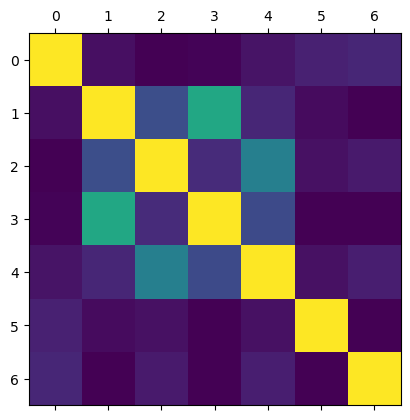

(<matplotlib.image.AxesImage at 0x1f2fd8929d0>, None)

In [17]:
# making a correlation heatmap using matplotlib
plt.matshow(sub_2.corr()),plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

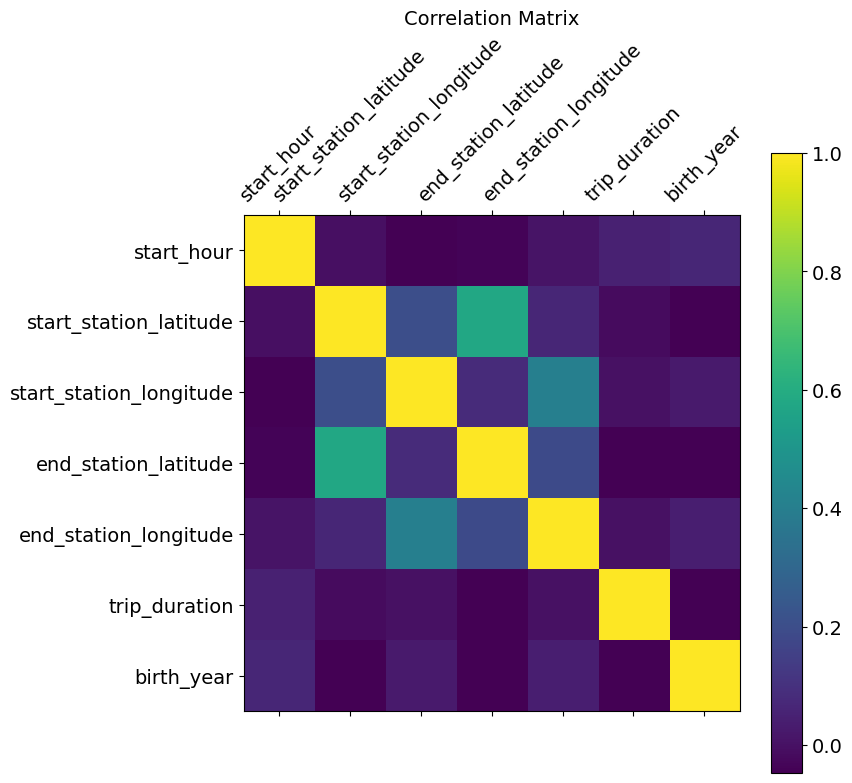

In [18]:
# add labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(sub_2.corr(), fignum=f.number)
# type of plot
plt.xticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Correlation Matrix',fontsize=14)
# add title

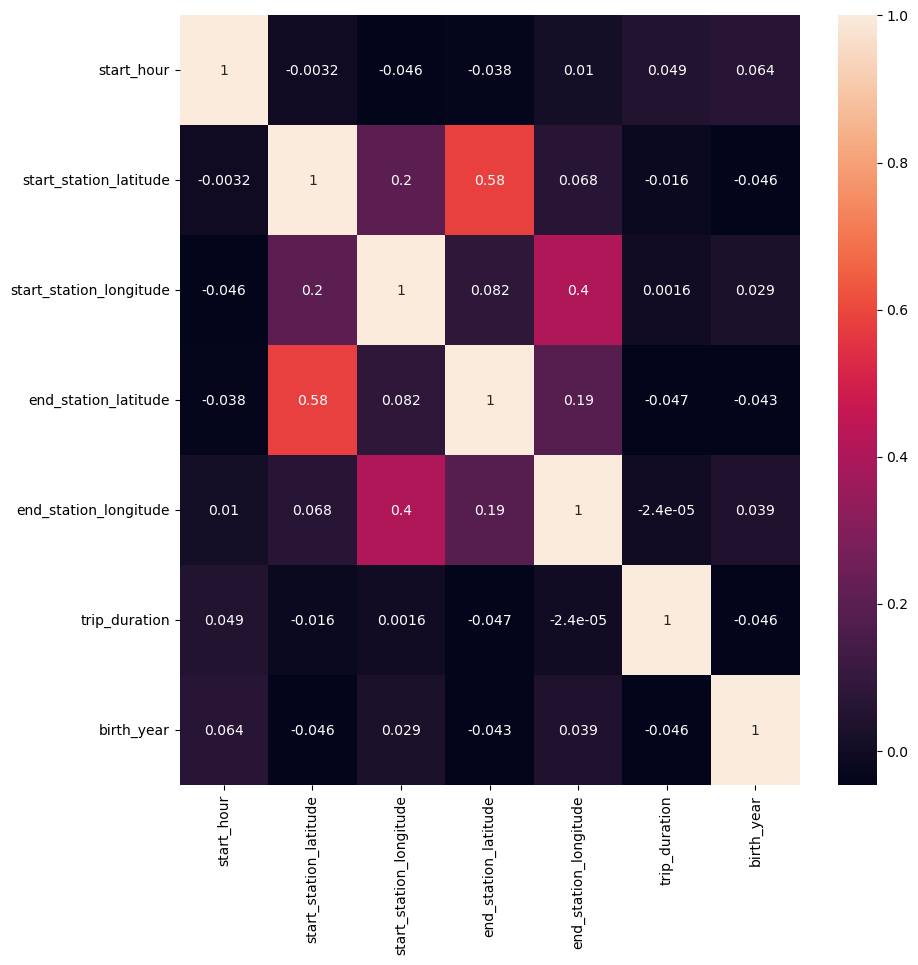

In [19]:
#subplot in matplot lib
f,ax=plt.subplots(figsize=(10,10))
#create the correlationheat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub_2.corr(), annot = True, ax=ax)

In [20]:
# make a third subset 
sub_3=citi[['start_hour','day_of_week']]

In [21]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_name       42993 non-null  object 
 4   start_station_latitude   42993 non-null  float64
 5   start_station_longitude  42993 non-null  float64
 6   end_station_id           42993 non-null  int64  
 7   end_station_name         42993 non-null  object 
 8   end_station_latitude     42993 non-null  float64
 9   end_station_longitude    42993 non-null  float64
 10  trip_duration            42993 non-null  int64  
 11  subscriber               42993 non-null  object 
 12  birth_year               42993 non-null  float64
 13  gender                   42993 non-null  int64  
 14  start_of_ride         

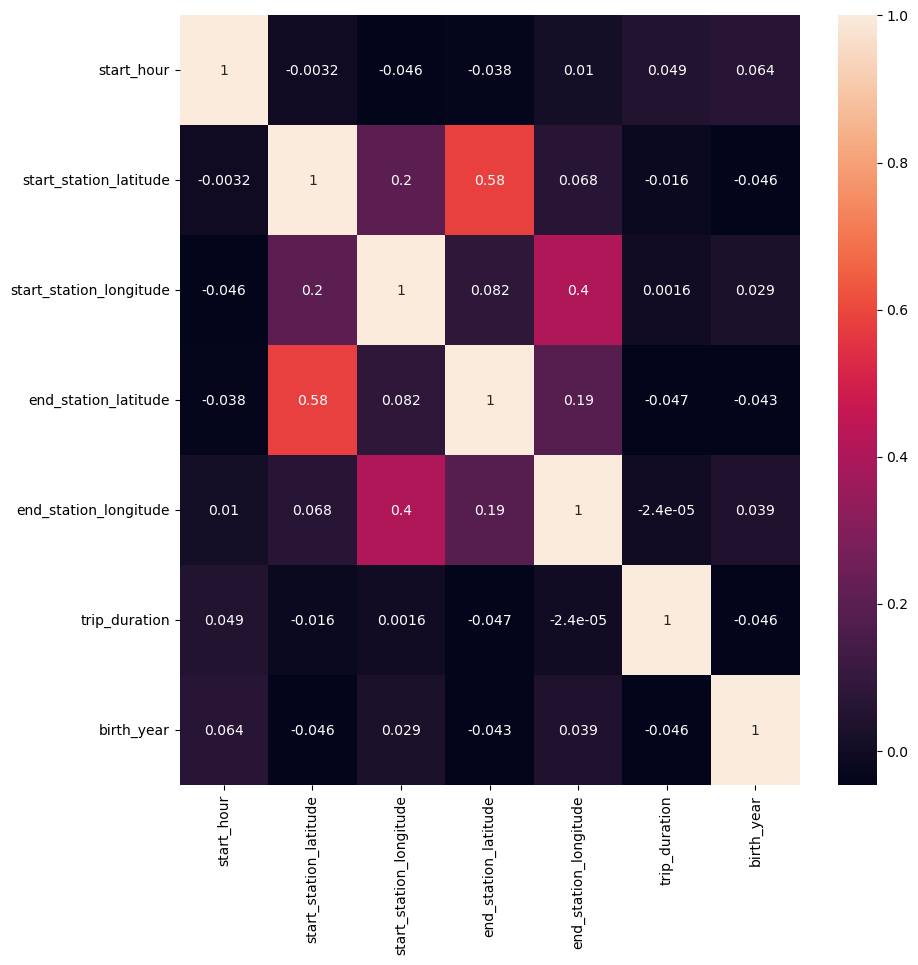

In [22]:
#subplot in matplot lib
f,ax=plt.subplots(figsize=(10,10))
#create the correlationheat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub_2.corr(), annot = True, ax=ax)

# Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

##### I'm finding it difficult to identify strong correlations between the variables in this chart. If I were to look at the number of rides per day, I could determine the busiest day and the peak hours, but that would require creating a separate subset of data, which isn't what the task is asking for.

##### Since a correlation matrix measures certain quantities, I believe the relationships worth investigating further, which might have meaningful connections, are:

 Start hour and trip duration: 
 Do people take longer rides in the morning or evening? 
 Does ride duration increase as the day progresses?
 Start hour and birth year: 
 Are younger or older individuals more likely to ride at certain times of the day?
 Trip duration and birth year: 
 Do older riders tend to have longer or shorter rides?

In [24]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_name       42993 non-null  object 
 4   start_station_latitude   42993 non-null  float64
 5   start_station_longitude  42993 non-null  float64
 6   end_station_id           42993 non-null  int64  
 7   end_station_name         42993 non-null  object 
 8   end_station_latitude     42993 non-null  float64
 9   end_station_longitude    42993 non-null  float64
 10  trip_duration            42993 non-null  int64  
 11  subscriber               42993 non-null  object 
 12  birth_year               42993 non-null  float64
 13  gender                   42993 non-null  int64  
 14  start_of_ride         

In [25]:
#changing datatype to - datetime
citi['ride_start']=pd.to_datetime(citi['start_of_ride'],infer_datetime_format=True) 

C:\Users\simpe\AppData\Local\Temp\ipykernel_9820\3519113408.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citi['ride_start']=pd.to_datetime(citi['start_of_ride'],infer_datetime_format=True)


In [26]:
#changing datatype to - datetime
citi['ride_end']=pd.to_datetime(citi['end_of_ride'],infer_datetime_format=True) 

C:\Users\simpe\AppData\Local\Temp\ipykernel_9820\3447450850.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citi['ride_end']=pd.to_datetime(citi['end_of_ride'],infer_datetime_format=True)


In [27]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42993 non-null  object        
 1   start_hour               42993 non-null  int64         
 2   start_station_id         42993 non-null  int64         
 3   start_station_name       42993 non-null  object        
 4   start_station_latitude   42993 non-null  float64       
 5   start_station_longitude  42993 non-null  float64       
 6   end_station_id           42993 non-null  int64         
 7   end_station_name         42993 non-null  object        
 8   end_station_latitude     42993 non-null  float64       
 9   end_station_longitude    42993 non-null  float64       
 10  trip_duration            42993 non-null  int64         
 11  subscriber               42993 non-null  object        
 12  birth_year               42993 n

In [28]:
#dropping end of ride  column
citi = citi.drop(columns = ['end_of_ride'])

In [29]:
#dropping start of ride time column
citi = citi.drop(columns = ['start_of_ride'])

In [30]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42993 non-null  object        
 1   start_hour               42993 non-null  int64         
 2   start_station_id         42993 non-null  int64         
 3   start_station_name       42993 non-null  object        
 4   start_station_latitude   42993 non-null  float64       
 5   start_station_longitude  42993 non-null  float64       
 6   end_station_id           42993 non-null  int64         
 7   end_station_name         42993 non-null  object        
 8   end_station_latitude     42993 non-null  float64       
 9   end_station_longitude    42993 non-null  float64       
 10  trip_duration            42993 non-null  int64         
 11  subscriber               42993 non-null  object        
 12  birth_year               42993 n

In [31]:
#seeing how many rides are in an hour
citi['start_hour'].value_counts(dropna=False)

start_hour
17    4398
18    4280
8     3127
16    3046
19    2930
9     2598
15    2436
13    2408
14    2401
12    2353
7     1980
20    1932
11    1841
10    1827
21    1371
22    1159
6      889
23     803
0      420
1      266
5      195
2      162
3       96
4       75
Name: count, dtype: int64

In [32]:
# Define data types for specific columns
data_types = {
    'start_time': 'datetime64',
    'end_time': 'datetime64'
}

In [33]:
# Wanting to see rides per day using group function
rides_per_day=citi.groupby(citi['ride_start'].dt.date).size()

In [34]:
rides_per_day

ride_start
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
dtype: int64

In [35]:
#trying to add day of week to it
rides_per_day.index=pd.to_datetime(rides_per_day.index)

In [36]:
rides_per_day['day_of_week'] = rides_per_day.index.day_name()

In [37]:
rides_per_day

ride_start
2013-09-01 00:00:00                                                  778
2013-09-02 00:00:00                                                  743
2013-09-03 00:00:00                                                 1397
2013-09-04 00:00:00                                                 1543
2013-09-05 00:00:00                                                 1435
2013-09-06 00:00:00                                                 1522
2013-09-07 00:00:00                                                 1205
2013-09-08 00:00:00                                                 1206
2013-09-09 00:00:00                                                 1487
2013-09-10 00:00:00                                                 1646
2013-09-11 00:00:00                                                 1587
2013-09-12 00:00:00                                                 1401
2013-09-13 00:00:00                                                 1701
2013-09-14 00:00:00                     

In [38]:
#seeing how many rides were taken on each day of week 
citi['day_of_week'].value_counts(dropna=False)

day_of_week
Mon    6797
Fri    6594
Wed    6490
Tue    6429
Thu    6212
Sun    5506
Sat    4965
Name: count, dtype: int64

## Scatter plots

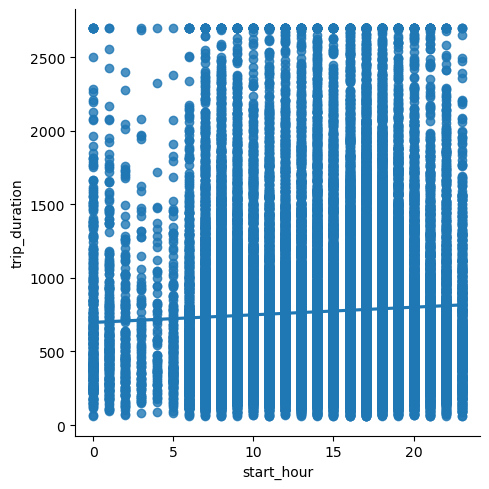

In [39]:
# create a scatterplot for the start hour and trip duration in seaborn
sns.lmplot(x='start_hour', y='trip_duration', data=citi)

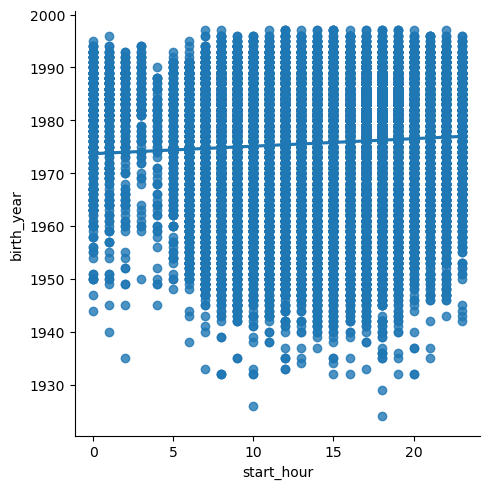

In [40]:
# create a scatterplot for the start hour and birth year in seaborn
sns.lmplot(x='start_hour', y='birth_year', data=citi)

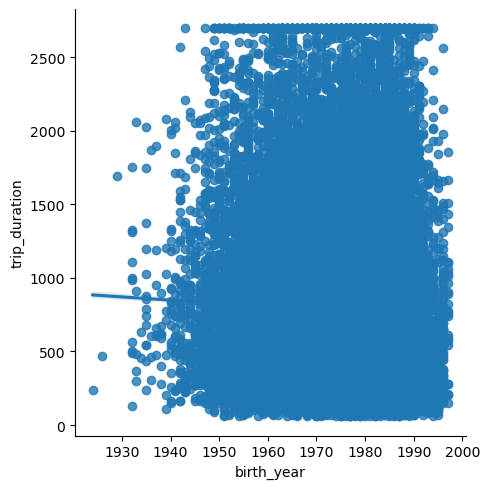

In [41]:
# create a scatterplot for the birth year and trip duration in seaborn
sns.lmplot(x='birth_year', y='trip_duration', data=citi)

# Scatterplot Discussion - Discuss the output in a markdown cell

##### The scatterplots appear quite cluttered. It might be helpful to group the data into bins for clearer analysis.

##### In the first scatterplot, there are fewer riders in the early morning hours, with an increase in activity after 6 am, peaking around 9 pm, but there isn't a strong correlation between these variables.

##### The second scatterplot shows a slightly positive trend line, but the data points are too widely dispersed to draw any meaningful conclusion about the relationship between start hour and birth year.

##### For the third scatterplot, no significant conclusions can be drawn from the data.

## Pair Plots

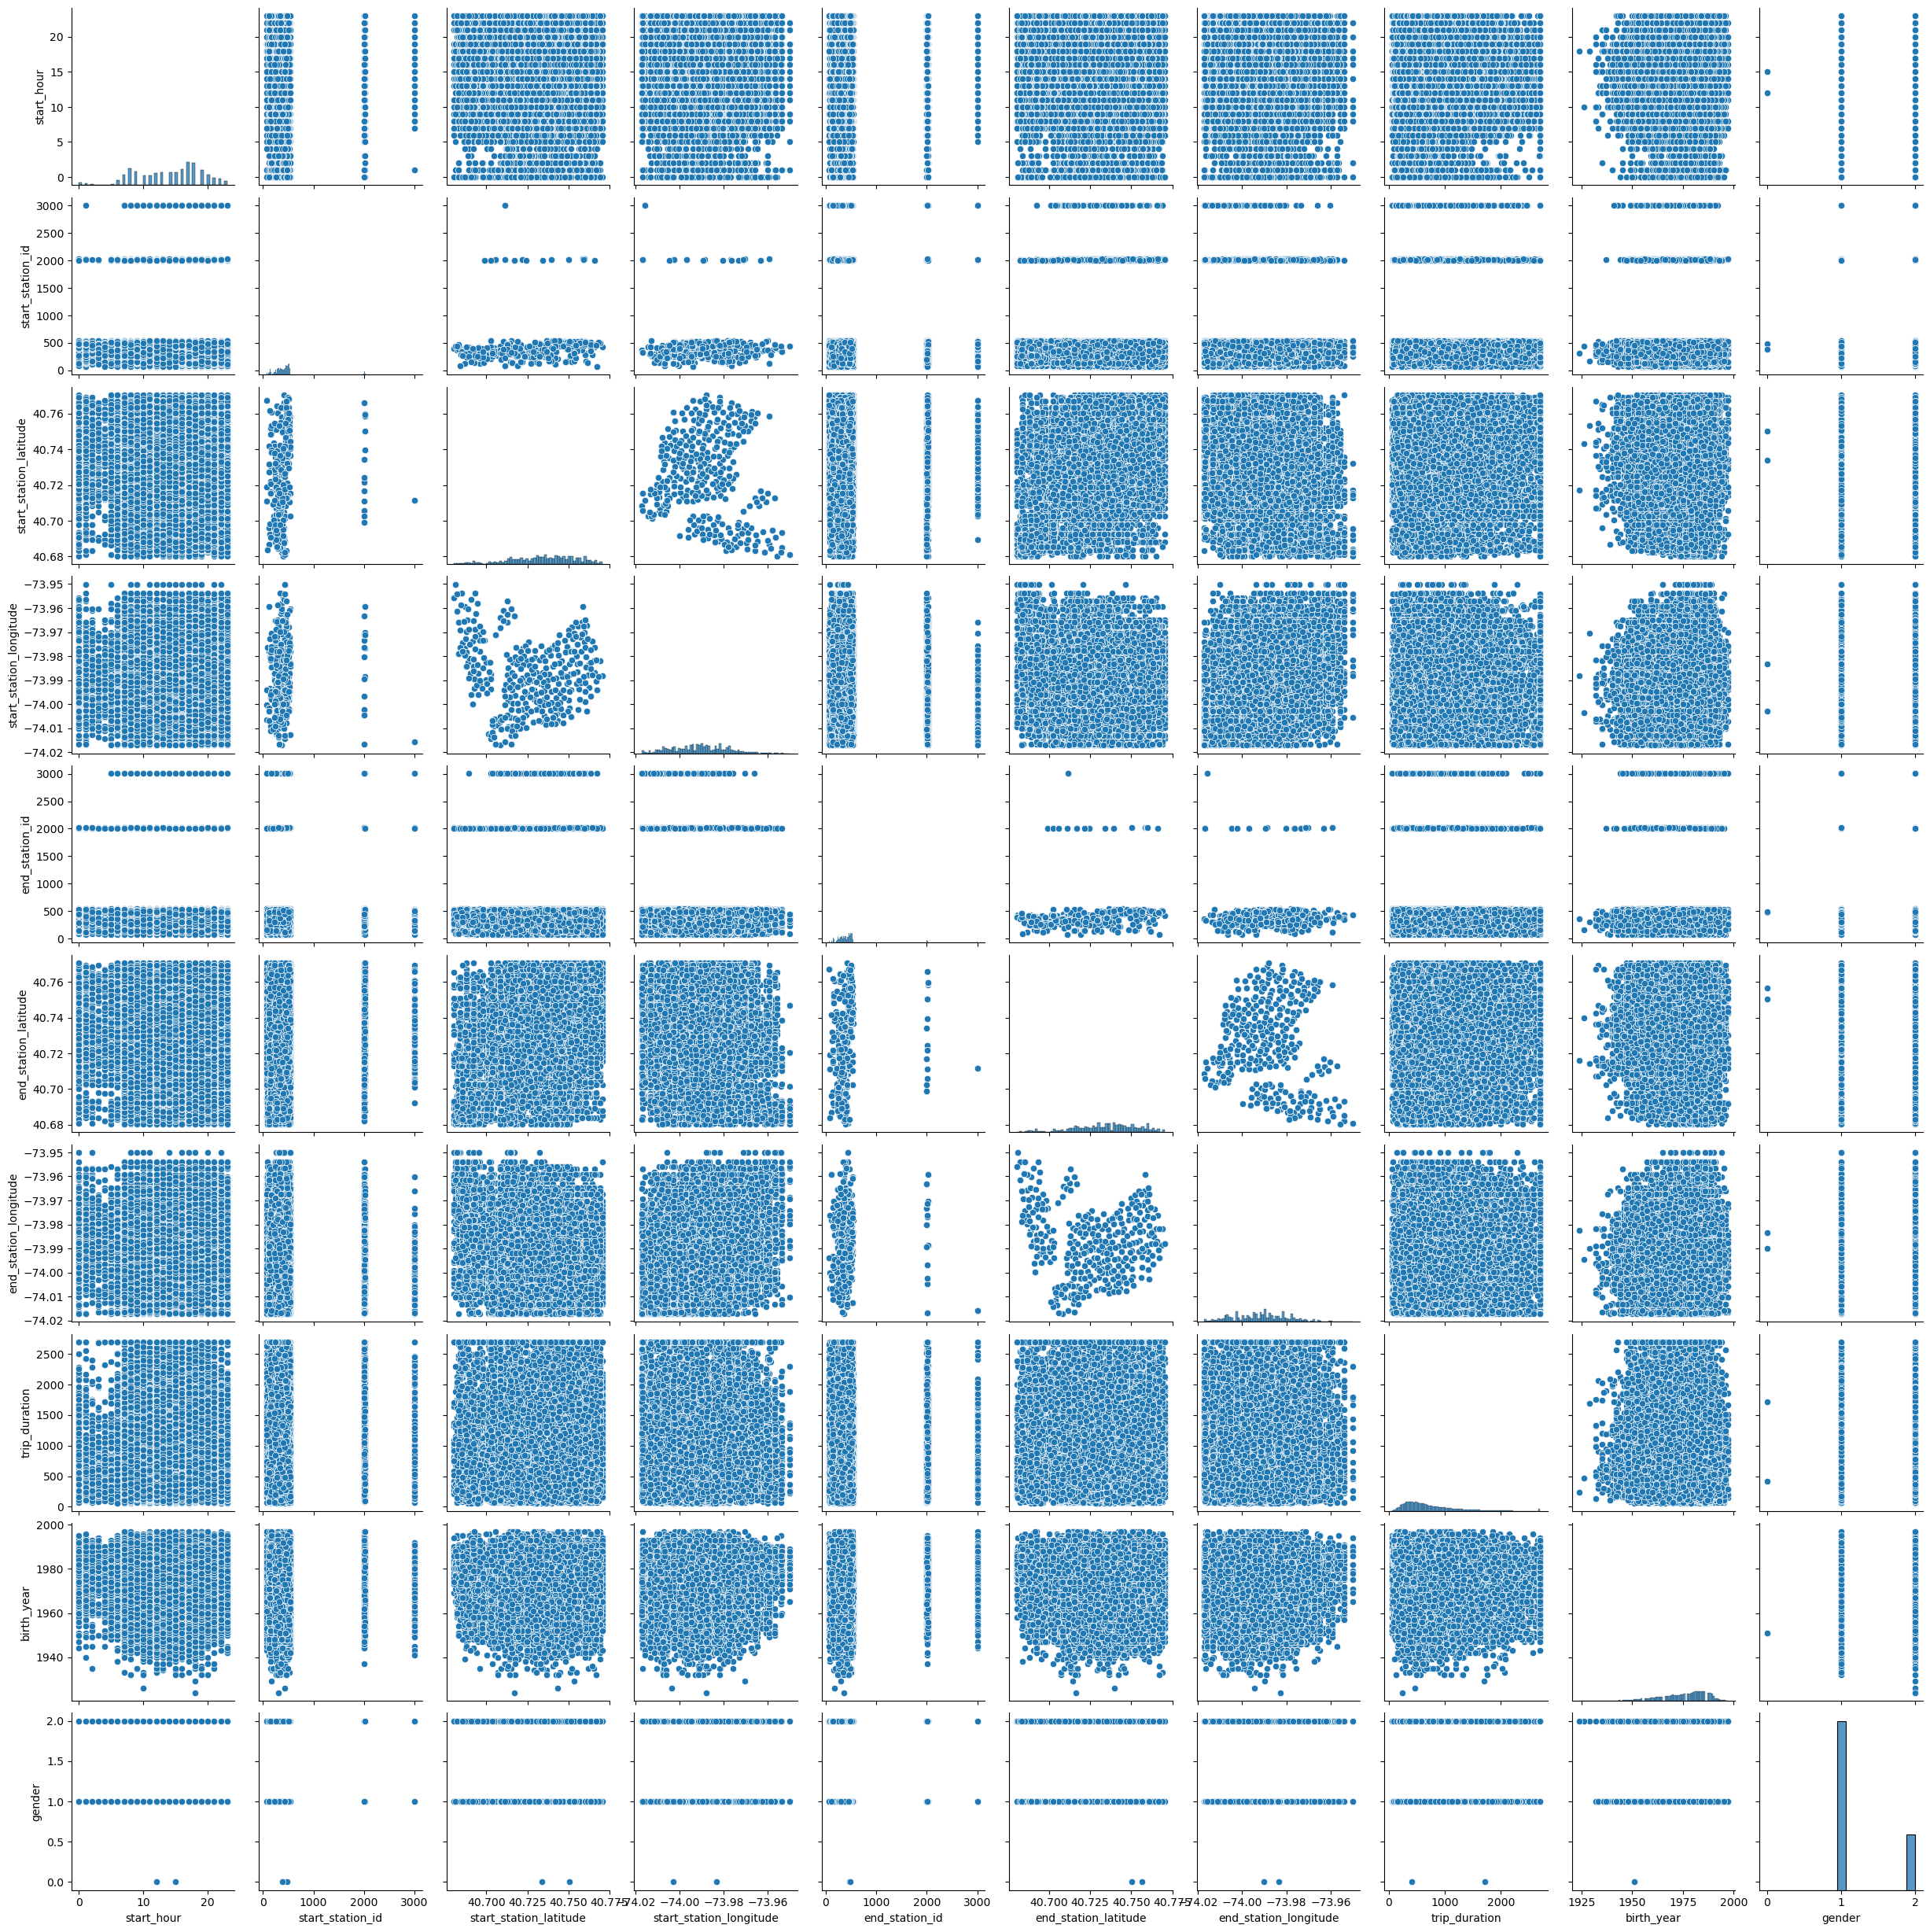

In [44]:
# create a pair plot of the entire data set
g=sns.pairplot(citi)

In [46]:
# i would like to pair this down so i can read it
sub=citi[['start_hour','start_station_id','end_station_id','trip_duration','birth_year','gender']]

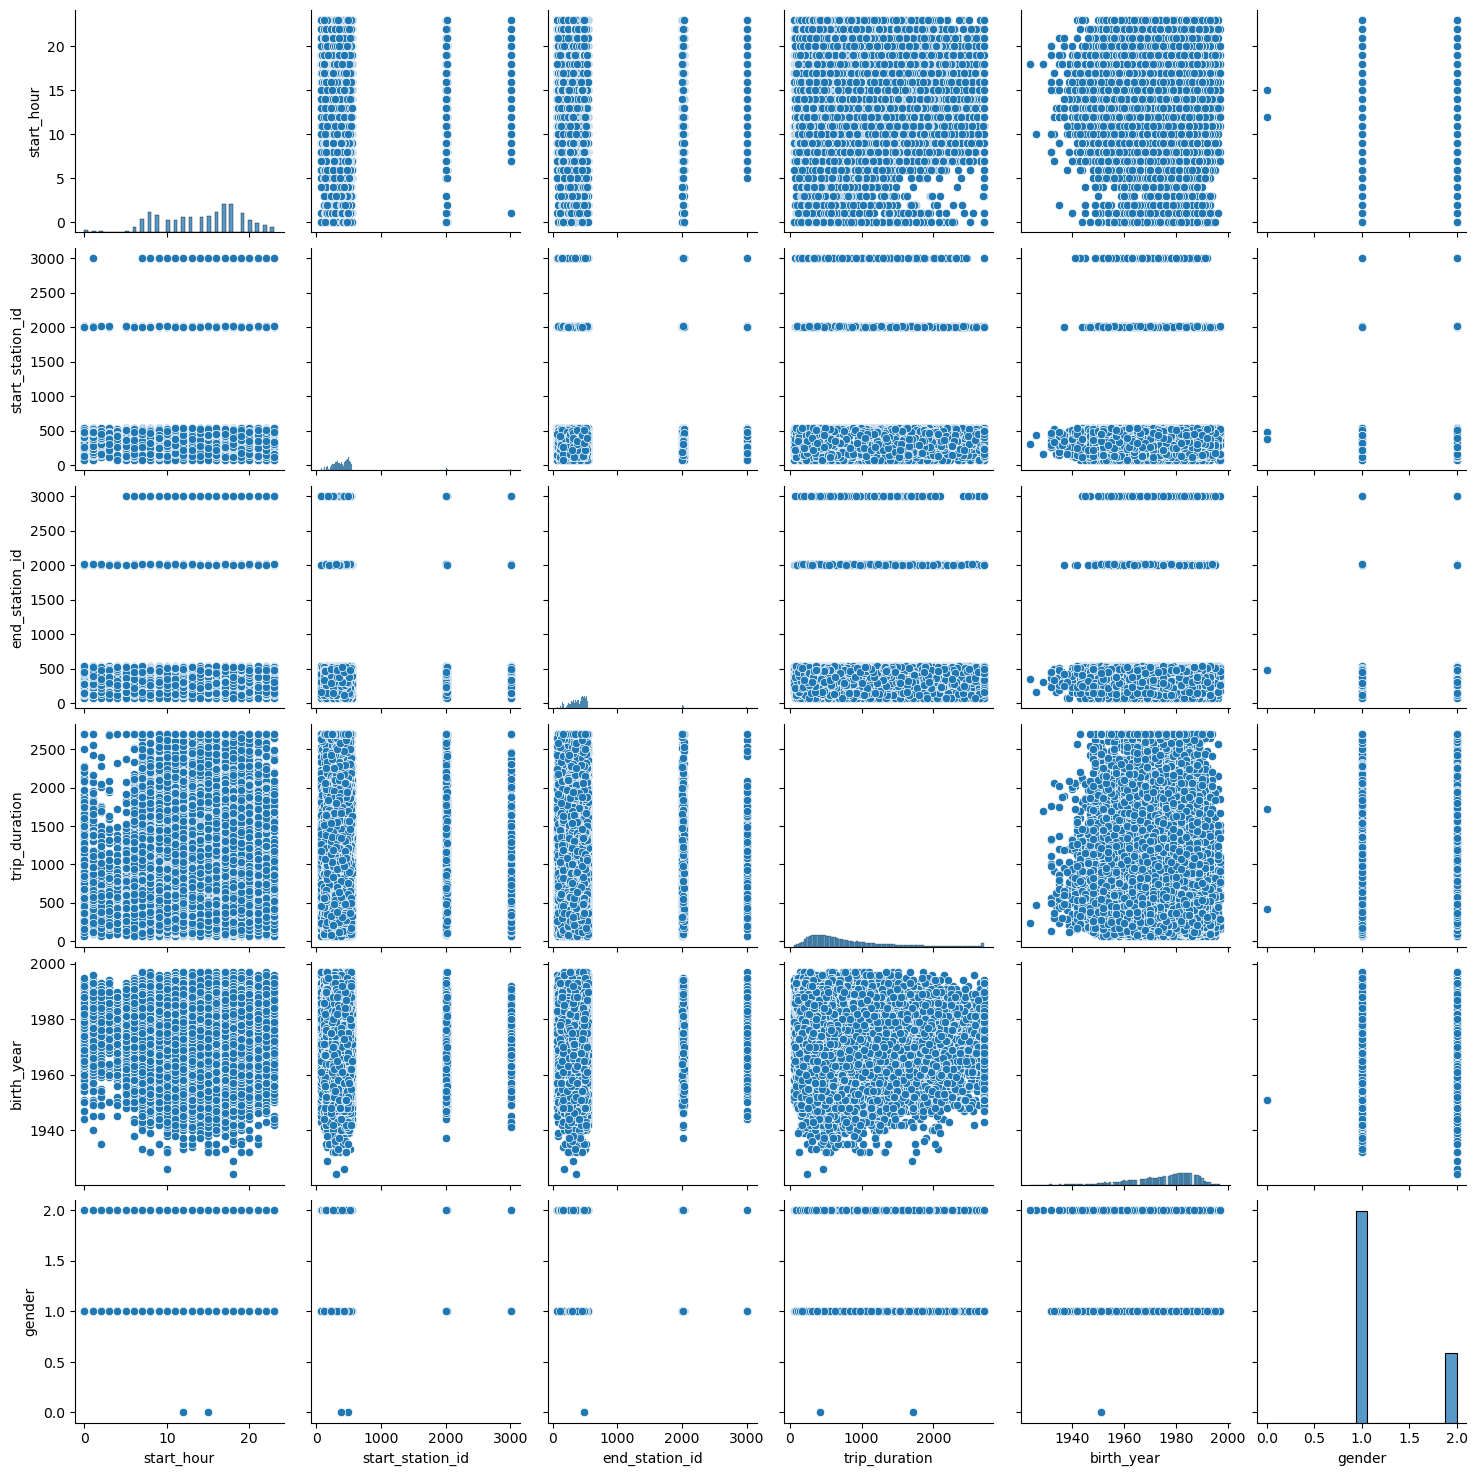

In [47]:
# create a pair plot of selected variables
g=sns.pairplot(sub)

# Pair Plot Discussion - Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

##### This doesn't really motivate me to dig deeper. It's starting to make me think I should just convert the days of the week into numbers.

<Axes: xlabel='start_hour', ylabel='Count'>

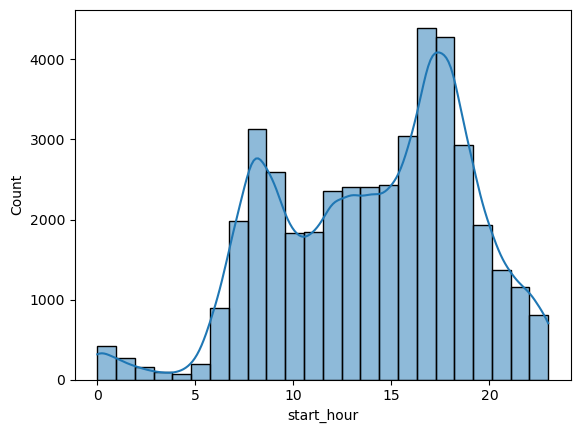

In [48]:
# creating a categorical variable that splits the start hour column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['start_hour'], bins =24, kde= True)

<Axes: xlabel='trip_duration', ylabel='Count'>

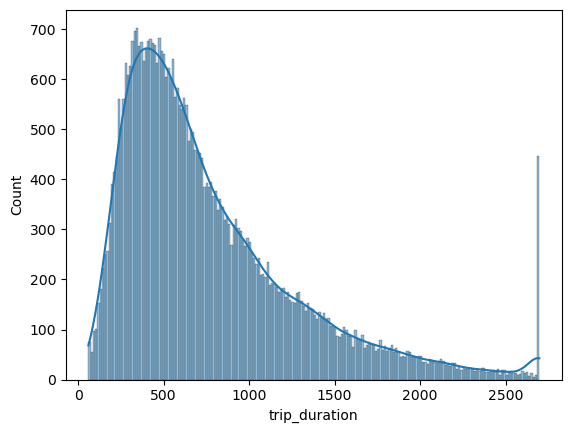

In [49]:
# creating a categorical variable that splits the trip duration column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['trip_duration'], bins =200, kde= True)

<Axes: xlabel='birth_year', ylabel='Count'>

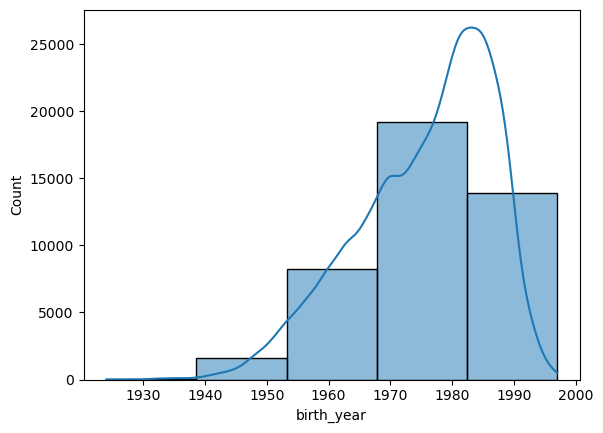

In [50]:
# creating a categorical variable that splits the trip duration column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['birth_year'], bins =5, kde= True)

In [51]:
# making categories for trip duration
citi.loc[citi['trip_duration'] < 600, 'Trip category'] = 'under 10 minutes'

In [52]:
citi.loc[(citi['trip_duration'] >= 600) & (citi['trip_duration']<1200), 'Trip category'] = '10-20 minutes'

In [53]:
citi.loc[citi['trip_duration'] >= 1200, 'Trip category'] = 'over 20 minutes'

In [54]:
citi['Trip category'].value_counts(dropna = False)

Trip category
under 10 minutes    20612
10-20 minutes       14881
over 20 minutes      7500
Name: count, dtype: int64

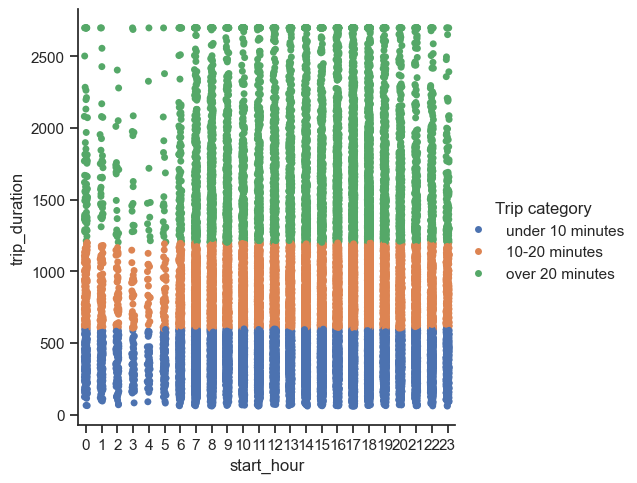

In [55]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="start_hour", y= "trip_duration", hue="Trip category", data=citi)

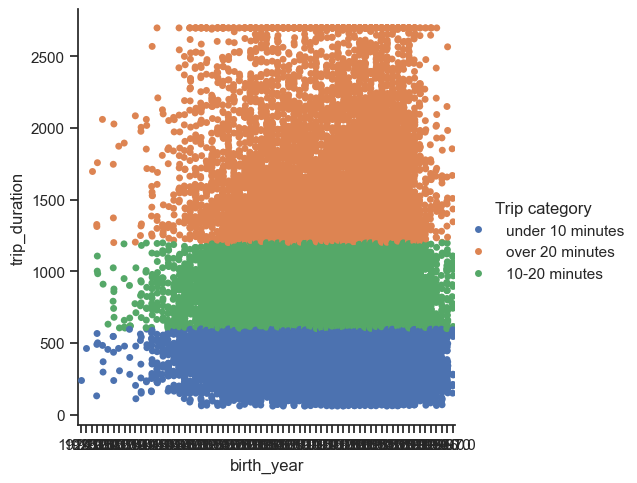

In [56]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="birth_year", y= "trip_duration", hue="Trip category", data=citi)

# Highlights

##### The busiest days for the Citi-Bike Monday!

##### The most customer use Citi-Bike during a day (General) Morning - Around 9AM, Afternoon - 6PM.

##### The least customer use Citi-Bike during a day (General) After Midnight 2-5AM

##### The most age group use Citi-Bike 30-40years old

##### The least age group use Citi-Bike 60 years and olders.

# Exporting

In [59]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'))